In [1]:
import matplotlib.pyplot as plt
from src.invert_c_theta import Invert
import pandas as pd
import firedrake

2024-11-02 21:44:42.514128: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 21:44:42.517981: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-02 21:44:42.528971: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730583882.559823    9331 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730583882.567548    9331 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-11-02 21:44:42.587749: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
drichlet_ids = [2,3,4]
side_ids = []
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig', reg_constant_c  = 0.1, read_mesh = False,opts = None, drichlet_ids = drichlet_ids , lcar = 9e3)

Reading outline from icepack database
Creating mesh
Reading mesh
Reading bedmachine data
Initializing function spaces
Initializing 3d function spaces
Initializing fields
Defining friction law
Setting ramp power to :  1
Initializing heat transport


(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='meters'>)

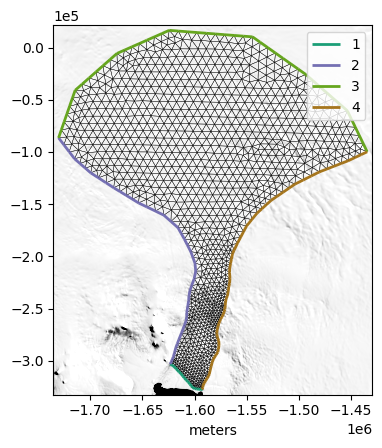

In [3]:
invert_pig.plot_mesh()

In [4]:
invert_pig.import_velocity_data(constant_val=0.01)
invert_pig.import_geophysics_data(name_list=['data/geophysics/ADMAP_MagneticAnomaly_5km.tif', 
                                                'data/geophysics/ANTGG_BouguerAnomaly_10km.tif', 
                                                'data/geophysics/GeothermalHeatFlux_5km.tif',
                                                'data/geophysics/ALBMAP_SurfaceAirTemperature_5km.tif',
                                                'data/geophysics/EIGEN-6C4_GravityDisturbance_10km.tif',
                                                'data/geophysics/ALBMAP_SnowAccumulation_Arthern_5km.tif',
                                                'data/geophysics/Englacial_temp_Pattyn_2013.tif'])

Reading velocity from measures database
C0 is constant: 0.01
Defining friction law
Defining friction law
using englacial temperature for rate factor
Geophysics data imported


(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Englacial Temperature'}, xlabel='meters'>)

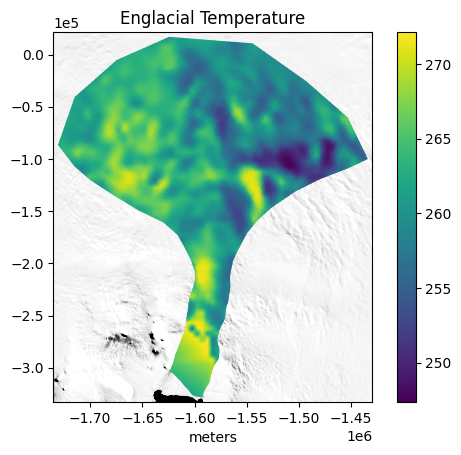

In [5]:
invert_pig.plot_englacial_temp()

In [6]:
invert_pig.invert_C(max_iterations=300, regularization_grad_fcn= True, loss_fcn_type = 'nosigma')

Using loss function without sigma

Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     7.123261e+07   3.295358e+03                  3.958842e+04   
  1     9.928873e+06   8.936432e+02   3.958842e+04   3.958842e+04   3         2         0         2         2         
  2     9.288190e+05   5.473094e+01   3.958842e+04   3.958842e+04   4         3         0         2         2         
  3     2.765750e+05   8.696798e+00   3.958842e+04   3.958842e+04   5         4         0         2         2         
  4     1.162347e+05   4.139693e+00   3.958842e+04   9.897104e+04   6         5         0         3         3         
  5     1.162347e+05   4.139693e+00   9.897104e+04   6.185690e+03   7         5         2         4         2         
  6     9.882688e+04   2.511318e+00   6.185690e+03   1.546422e+04   8         6         0         1         3         
  7     7.089268e+04   1.32641

In [7]:
u_optimized =  invert_pig.simulation()

In [8]:
firedrake.assemble(invert_pig.loss_functional_nosigma(u_optimized))
# c-reg 0.1 : 12542.602690978807
# 1 : 22224.059080409508

9599.307883868198

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Error in U'}, xlabel='meters'>)

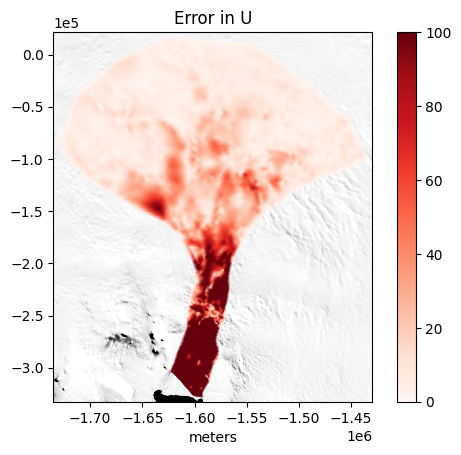

In [9]:
invert_pig.plot_u_error_no_sigma(u_optimized, vmax = 100)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '% Error in U'}, xlabel='meters'>)

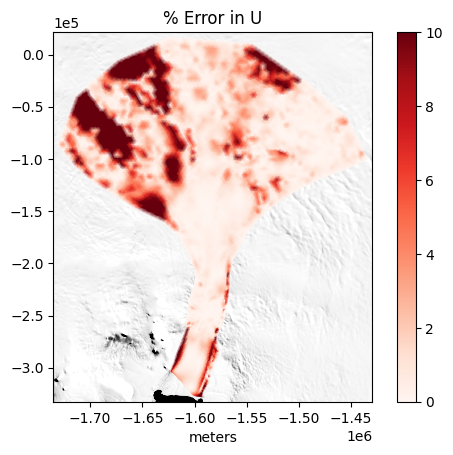

In [10]:
invert_pig.plot_u_error_percentage(u_optimized, vmax = 10)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '$||V||$'}, xlabel='meters'>)

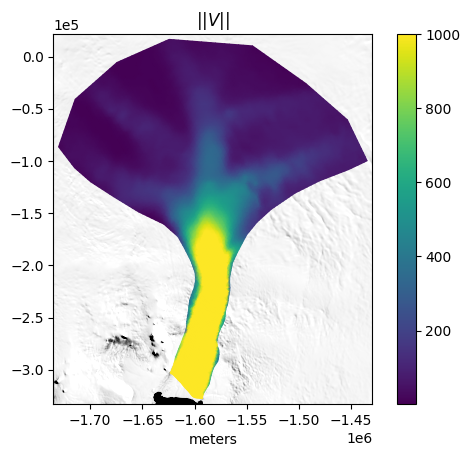

In [11]:
invert_pig.plot_u_mag(u_optimized, vmax = 1000)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Surface velocity streamlines'}, xlabel='meters'>)

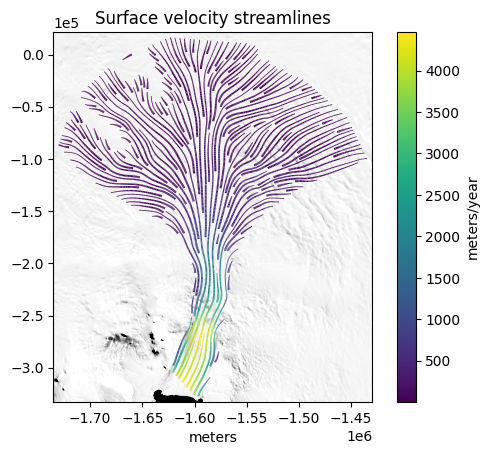

In [12]:
invert_pig.plot_streamline_u(u_optimized)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'C'}, xlabel='meters'>)

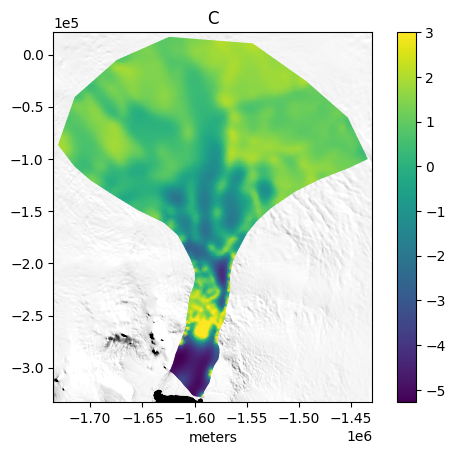

In [13]:
invert_pig.plot_C(vmax = 3)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '$C_{b}$'}, xlabel='meters'>)

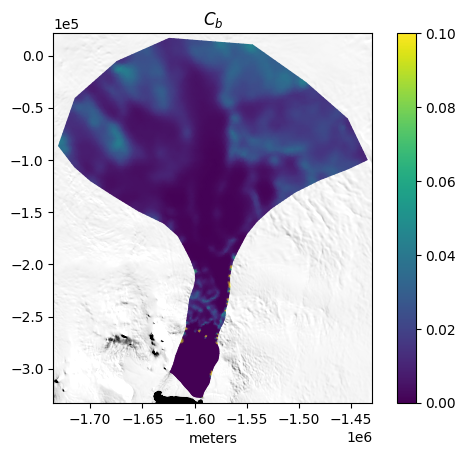

In [14]:
invert_pig.plot_C_total(vmax = 0.1)

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': 'Grounding Line'}, xlabel='meters'>)

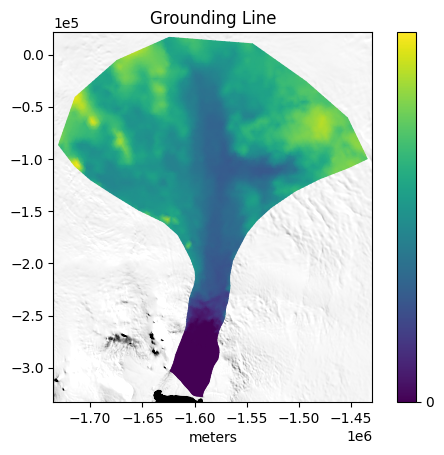

In [15]:
invert_pig.plot_grounding_line()

In [16]:
#invert_pig.inverse_u = invert_pig.u_initial
invert_pig.inverse_u = u_optimized

In [17]:
#theta = invert_pig.θ
C = invert_pig.C

In [18]:
df = invert_pig.get_dataframe(u_optimized)
df.to_csv('regularized_const_01C_C_only_englacial_temp_pig_r01_geo_12.csv')

In [24]:
invert_pig.opts = {"dirichlet_ids": invert_pig.drichlet_ids,
                    "side_wall_ids": invert_pig.side_ids,
                   "diagnostic_solver_type": "icepack",
                "diagnostic_solver_parameters": {
                    "max_iterations":50,},}
invert_pig.create_model_weertman()

In [34]:
invert_pig.compute_C_ML_regress(filename = 'model_4_dotson2_thwaites1_r1_geo_static', half = False, flip = False, use_driving_stress = False, C_bounds = [-50, 55], θ_bounds =[-102, 200], number_of_models = 14)
u_optimized =  invert_pig.simulation()

/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


/home/firedrake/firedrake/lib/python3.10/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator MinMaxScaler from version 1.5.1 when using version 1.4.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


152/152 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [35]:
firedrake.assemble(invert_pig.loss_functional_nosigma(u_optimized))
# 215402.4880117473

3878708.1658850876

In [36]:
df = invert_pig.get_dataframe(u_optimized)
df.to_csv('pig_ML_geo_4_static_2_1.csv')

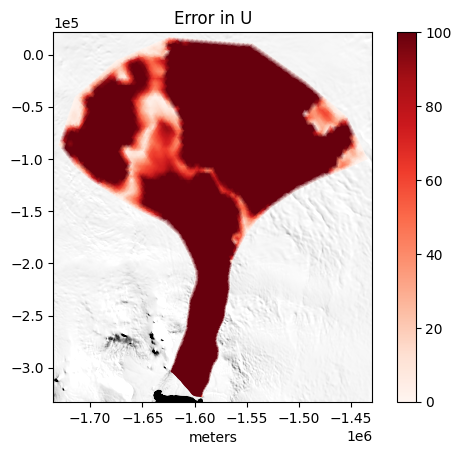

In [37]:
invert_pig.plot_u_error_no_sigma(u_optimized, vmax = 100)

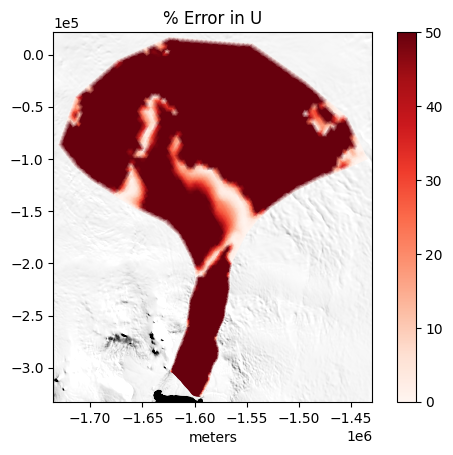

In [38]:
invert_pig.plot_u_error_percentage(u_optimized, vmax = 50)

In [39]:
invert_pig.ML_u = u_optimized

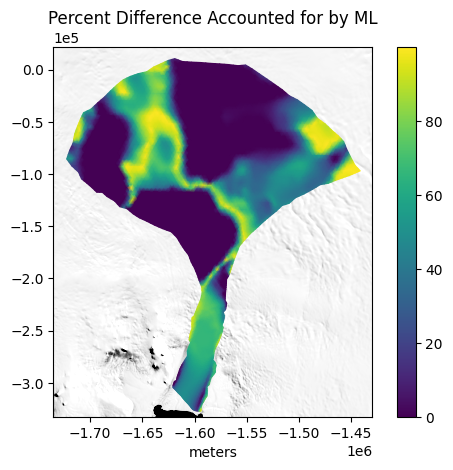

In [40]:
# Static2_1
invert_pig.plot_percent_accounted(vmin = 0)

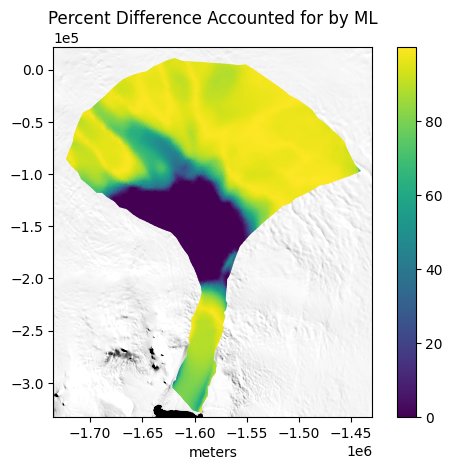

In [31]:
# Dynamic2_1
invert_pig.plot_percent_accounted(vmin = 0)

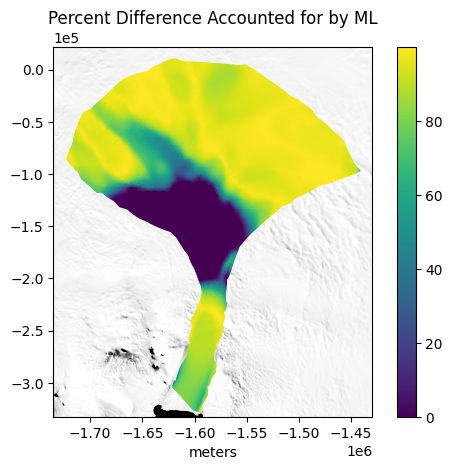

In [47]:
# Dynamic
invert_pig.plot_percent_accounted(vmin = 0)

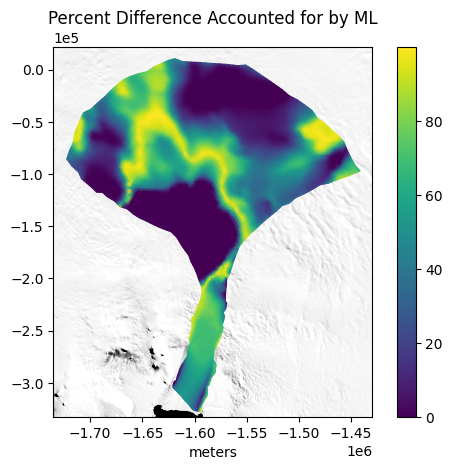

In [38]:
# Static
invert_pig.plot_percent_accounted(vmin = 0)

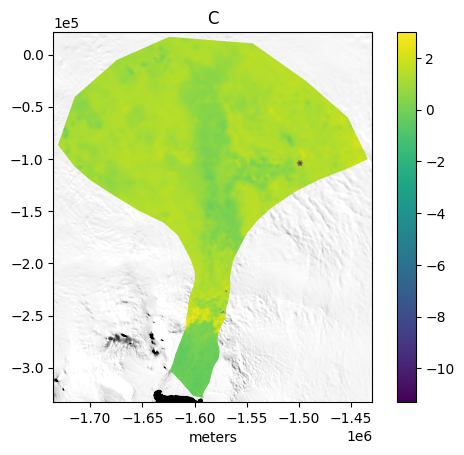

In [32]:
invert_pig.plot_C(vmax = 3)

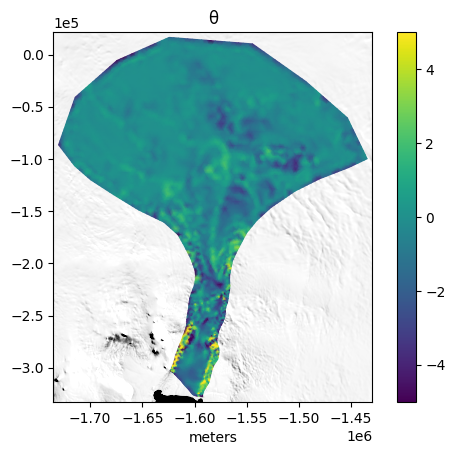

In [33]:
invert_pig.plot_theta(vmin = -5, vmax = 5)